## Introduction
This notebook consists of two parts:     
1- Outlier Detection     
2- Report   

## 1- Outlier Detection
Consider the following scenario: a process generates a set of instances, each instance is encoded as a string of characters; at random times and in no particular order, some event is responsible for the generation of outliers. Each instance is either an inlier or an outlier.

Your task is to devise a program that can detect outliers among the instances, i.e. the program should classify each instance as either inlier and outlier. You may use any machine learning library, or software packages. We provide a single text file: test.data, which contains a random mixture of instances and outliers in no particular order.

### Functions
The following functions were created to read, encode/decode a sequence of characters, modeling and predicting data, and visualizing results. 

In [87]:
import pandas as pd
import pandas_profiling
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)
import warnings
warnings.filterwarnings("ignore")

# 1
def importing_data(path):
    ''' importing data '''
    df = pd.read_csv(path, sep=" ", header=None)
    return df

#Build the char index that we will use to encode seqs to numbers
char_index = 'abcdefghijklmnopqrstuvwxyz'
char_index +='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_index += '0123456789'
char_index += '().,-/+=&$?@#!*:;_[]|%⸏{}\"\'' + ' ' +'\\'

char_to_int = dict((c, i) for i, c in enumerate(char_index))
int_to_char = dict((i, c) for i, c in enumerate(char_index))
# 2
def encode_sequence_char(seq_strs, feat_n=0):
    ''' convert a character sequence into numbers sequence '''
    encoded_seqs = []
    for seq in seq_strs:
        encoded_seq = [char_to_int[c] for c in seq]
        encoded_seqs.append(encoded_seq)
    if(feat_n > 0):
        encoded_seqs.append(np.zeros(feat_n))
    return pad_sequences(encoded_seqs, padding = 'post')

# 3
def decode_sequence_char(seq_strs):
    ''' convert a number sequence into a character sequence '''
    decoded_seqs = []
    for seq in seq_strs:
        decoded_seq = [int_to_char[i] for i in seq]
        decoded_seqs.append(decoded_seq)
    return decoded_seqs

#%% 

In [88]:
#print module versions for reproducibility
import matplotlib
import keras
print('Numby version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('Matplotlib version {}'.format(matplotlib.__version__))
print('Seaborn version {}'.format(sns.__version__))
print('Sklearn version {}'.format(sklearn.__version__))
print('Keras version {}'.format(keras.__version__))

Numby version 1.16.5
Pandas version 0.25.1
Matplotlib version 3.1.1
Seaborn version 0.9.0
Sklearn version 0.21.3
Keras version 2.3.1


### Exploring the data

In [89]:
data_dir = r'D:\test.data'    # data path
df = importing_data(data_dir)                      # importing data as a pandas dataframe

In [90]:
df.head()

,0
0,dddddddeidddddfdddhgdddddgdhddddfdddhddededdde...
1,ddgddddddhgdddddgdhddddfdddhfdedehddeiddededgd...
2,dddddgdhddddfdddiddedehddeiddeddddddideddddddd...
3,ehddeiddedddgddddedddddgdhgddehddiddeddfdhiedd...
4,ddgdddddffddddddiddddhdddeidddddfdddfgdddddddh...


In [91]:
df.shape

(600, 1)

In [92]:
df[0].describe()

count                                                   600
unique                                                  600
top       ddddddghddfhidfdgddeiddfddddddggddddddfddhdddi...
freq                                                      1
Name: 0, dtype: object

In [93]:
len(df[0][:])

600

In [94]:
for i in range(20):
    print(Counter(df[0][i]))    # list elements of unique charters on each instance
    #print(list(Counter(df[0][i]).values()))  # count the elements frequency

Counter({'d': 105, 'e': 9, 'i': 9, 'f': 9, 'h': 9, 'g': 9})
Counter({'d': 105, 'g': 9, 'h': 9, 'f': 9, 'e': 9, 'i': 9})
Counter({'d': 105, 'g': 9, 'h': 9, 'f': 9, 'i': 9, 'e': 9})
Counter({'d': 105, 'e': 9, 'h': 9, 'i': 9, 'g': 9, 'f': 9})
Counter({'d': 105, 'g': 9, 'f': 9, 'i': 9, 'h': 9, 'e': 9})
Counter({'d': 105, 'e': 9, 'h': 9, 'i': 9, 'g': 9, 'f': 9})
Counter({'d': 105, 'e': 9, 'i': 9, 'f': 9, 'g': 9, 'h': 9})
Counter({'d': 105, 'e': 9, 'h': 9, 'g': 9, 'f': 9, 'i': 9})
Counter({'d': 105, 'h': 9, 'g': 9, 'i': 9, 'f': 9, 'e': 9})
Counter({'d': 105, 'h': 9, 'g': 9, 'f': 9, 'i': 9, 'e': 9})
Counter({'d': 105, 'f': 9, 'e': 9, 'h': 9, 'i': 9, 'g': 9})
Counter({'d': 105, 'g': 9, 'f': 9, 'e': 9, 'h': 9, 'i': 9})
Counter({'d': 105, 'h': 9, 'e': 9, 'i': 9, 'g': 9, 'f': 9})
Counter({'d': 105, 'g': 9, 'h': 9, 'f': 9, 'e': 9, 'i': 9})
Counter({'d': 105, 'h': 9, 'f': 9, 'g': 9, 'i': 9, 'e': 9})
Counter({'d': 105, 'e': 9, 'g': 9, 'f': 9, 'h': 9, 'i': 9})
Counter({'d': 105, 'h': 9, 'i': 9, 'f': 

In [95]:
encoded_seqs = encode_sequence_char(df[0].values.tolist()) # encode each string sequence to an integer array

In [96]:
print(df[0][0])          # print the first string sequence before encoding it
print(encoded_seqs[0])   # print the first encoded string

dddddddeidddddfdddhgdddddgdhddddfdddhddededddeddiedddgddddedddddddhgddehdhdddeegfdhiddddddidhhddddddddifdddddgfddfdidfdddddiddfdddddgdggddddifddddddid
[3 3 3 3 3 3 3 4 8 3 3 3 3 3 5 3 3 3 7 6 3 3 3 3 3 6 3 7 3 3 3 3 5 3 3 3 7
 3 3 4 3 4 3 3 3 4 3 3 8 4 3 3 3 6 3 3 3 3 4 3 3 3 3 3 3 3 7 6 3 3 4 7 3 7
 3 3 3 4 4 6 5 3 7 8 3 3 3 3 3 3 8 3 7 7 3 3 3 3 3 3 3 3 8 5 3 3 3 3 3 6 5
 3 3 5 3 8 3 5 3 3 3 3 3 8 3 3 5 3 3 3 3 3 6 3 6 6 3 3 3 3 8 5 3 3 3 3 3 3
 8 3]


In [97]:
encoded_seqs.shape  # the shape of the new encoded sequence

(600, 150)

In [98]:
df_enc = pd.DataFrame(encoded_seqs)

In [99]:
df_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,3,3,3,3,3,3,3,4,8,3,...,8,5,3,3,3,3,3,3,8,3
1,3,3,6,3,3,3,3,3,3,7,...,3,3,3,3,3,3,3,3,4,8
2,3,3,3,3,3,6,3,7,3,3,...,3,3,3,8,5,3,3,3,7,6
3,4,7,3,3,4,8,3,3,4,3,...,3,5,3,3,3,7,3,3,4,3
4,3,3,6,3,3,3,3,3,5,5,...,3,8,3,3,5,3,3,3,3,6


In [100]:
df_enc.columns = ['a_' + str(x) for x in range(150)]

### Prepare the Data and Build an Autoencoder

In [23]:
scaler = MinMaxScaler()      # normalizing using MinMaxScaler
scaled_seqs = scaler.fit_transform(encoded_seqs)
X_train = scaled_seqs[:480]     # split the encoded sequence into 80% training set
X_test = scaled_seqs[480:]      # 20% test set

In [31]:
input_dim = X_train.shape[1] #features
encoding_dim = 8 # first layer
hidden_dim = int(encoding_dim / 2)
nb_epoch = 200
batch_size = 32
learning_rate = 0.01
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim, activation = "relu")(encoder)
decoder = Dense(hidden_dim, activation = 'relu')(encoder)
decoder = Dense(encoding_dim, activation = 'relu')(encoder)
decoder = Dense(input_dim, activation = 'tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

### Fit the Model

In [57]:
autoencoder.compile(optimizer = 'adam', 
                    loss = 'mean_squared_error', 
                    metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "model_seqs2.h5",
                               verbose = 0,
                               save_best_only = True)

history = autoencoder.fit(X_train, X_train,
                    epochs = nb_epoch,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_test, X_test),
                    verbose = 0,
                    callbacks = [checkpointer]).history

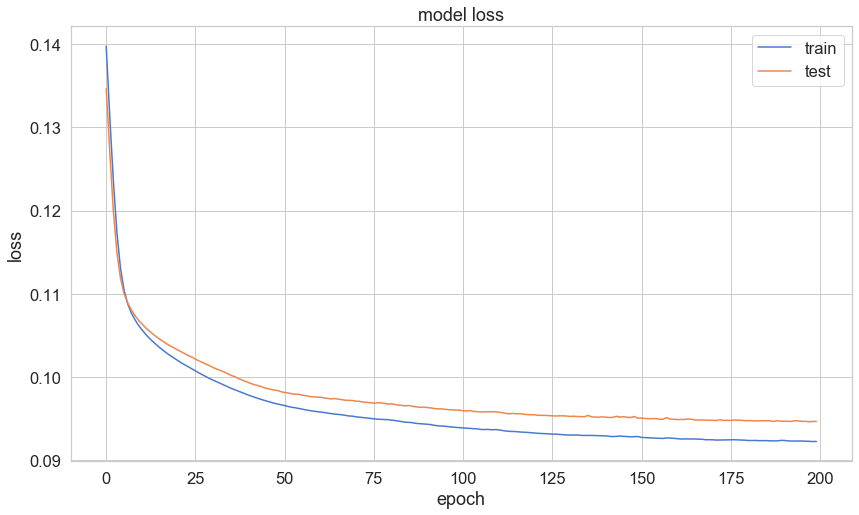

In [40]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [41]:
autoencoder = load_model('model_seqs2.h5')
print(f'Min Loss:{np.min(history["loss"])}')

Min Loss:0.09226552446683248


### Calculate the Error Term

In [43]:
#get the MSE error term
predictions = autoencoder.predict(scaled_seqs)
mse = np.mean(np.power(scaled_seqs - predictions, 2), axis = 1)
print('MSE:', np.quantile(mse, 0.99)) # 99% quatile - only 1% have error score higher than that

MSE: 0.09991868168288971


### Calculate the MSE for all the sequences (df)

In [44]:
encoded_seqs = encode_sequence_char(df.iloc[:, 0])              #encode all the data
scaled_data = MinMaxScaler().fit_transform(encoded_seqs)        #scale the data
predicted = autoencoder.predict(scaled_data)                    #predict the data
mse = np.mean(np.power(scaled_data - predicted, 2), axis = 1)   # get the error term
df['MSE'] = mse    # creat a new column 'MSE' and add the errors to df

In [45]:
df.head()

,0,MSE
0,dddddddeidddddfdddhgdddddgdhddddfdddhddededdde...,0.079972
1,ddgddddddhgdddddgdhddddfdddhfdedehddeiddededgd...,0.095622
2,dddddgdhddddfdddiddedehddeiddeddddddideddddddd...,0.093839
3,ehddeiddedddgddddedddddgdhgddehddiddeddfdhiedd...,0.093538
4,ddgdddddffddddddiddddhdddeidddddfdddfgdddddddh...,0.086511


In [47]:
mse_threshold = np.quantile(df['MSE'], 0.99)    # add MSE threshold for the outlier
print(f'MSE 0.99 threshhold:{mse_threshold}')

MSE 0.99 threshhold:0.09991868168288971


In [48]:
df['MSE_Outlier'] = 1  # create a new column for the Outliers
df.loc[df['MSE'] > mse_threshold, 'MSE_Outlier'] = -1   # if the onstance is an Outlier set it to -1

In [49]:
df['MSE_Outlier'].value_counts()

 1    594
-1      6
Name: MSE_Outlier, dtype: int64

There is 6 outliers

In [52]:
df[df.MSE_Outlier == -1]

,0,MSE,MSE_Outlier
98,ddidehddddddddiddddddgfddfdidfdgddhiddfhdddddg...,0.100018,-1
280,fddfdgddddfiddddfdidhdididdddddfddddgddddiddde...,0.100203,-1
313,dddddddidgddddddieddgdededddddfdidhddeddddhgdd...,0.099988,-1
536,gddeddddddeegfdhiddddddidhhddddddddifdddddgfdd...,0.100063,-1
568,gfdhiddddddiddhddddddedifddddddfddddidfggdddid...,0.100167,-1
573,dfddddddggddddddfdddddddddddddddeiddddfddddhgd...,0.100960,-1


In [56]:
print(df[0][98])
Counter(df[0][98])

ddidehddddddddiddddddgfddfdidfdgddhiddfhdddddggddddddfddddddiddgdddddeddddddfdddhgfddidgdhddddfdddhdddddhddeidiedddgdeddedddddddhgddehdddddeedfddidddd


Counter({'d': 105, 'i': 9, 'e': 9, 'h': 9, 'g': 9, 'f': 9})

### 2- Report        
The data contains 6 outliers.